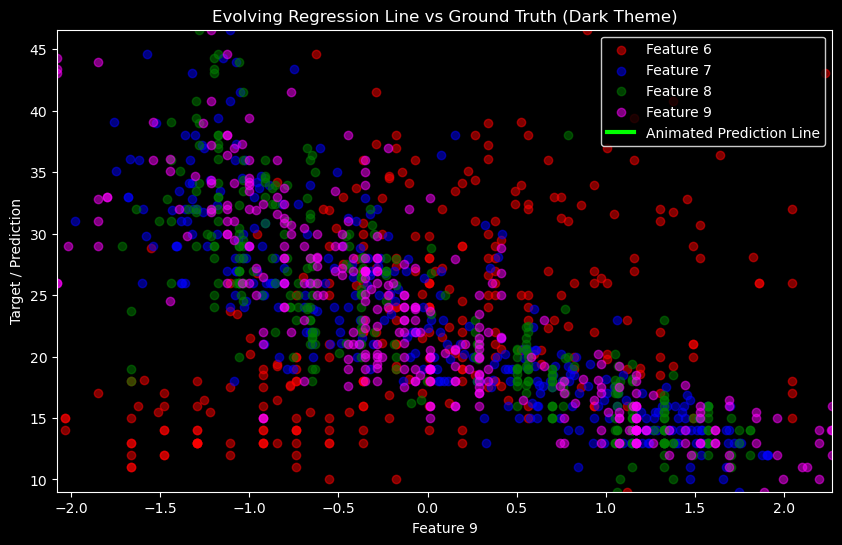

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# === Load your data ===
df = pd.read_csv("gd_convergence_log.csv")
xy_df = pd.read_csv("X-and-y-train.csv")

# === Extract training data ===
X_train = xy_df[[col for col in xy_df.columns if col.startswith("feature_")]].to_numpy()
y_train = xy_df["y_train"].to_numpy()

# === Extract weights, bias, and iteration logs ===
weights = df[[col for col in df.columns if col.startswith("w")]].to_numpy()
biases = df["bias"].to_numpy()
iterations = df["iteration"].to_numpy()

# === Choose the feature for animation and others for static scatter plots ===
feature_indices = [6, 7, 8, 9]  # 👈 Customize your features here
animated_feature_index = feature_indices[-1]  # Animate the last one

# === Feature value arrays ===
x_features = [X_train[:, i] for i in feature_indices]
x_animated = x_features[-1]

# === Set up the x-axis line for the animated regression line ===
x_min, x_max = x_animated.min(), x_animated.max()
x_line = np.linspace(x_min, x_max, 100)

# === Set up the plot ===
fig, ax = plt.subplots(figsize=(10, 6), facecolor='black')
ax.set_facecolor('black')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_train.min(), y_train.max())
ax.set_xlabel(f"Feature {animated_feature_index}", color='white')
ax.set_ylabel("Target / Prediction", color='white')
ax.set_title("Evolving Regression Line vs Ground Truth (Dark Theme)", color='white')

# === Style the axes ===
ax.tick_params(colors='white')
for spine in ax.spines.values():
    spine.set_color('white')

# === Scatter plots for each feature ===
colors = ['red', 'blue', 'green', 'magenta']
labels = [f"Feature {i}" for i in feature_indices]

for i in range(4):
    ax.scatter(x_features[i], y_train, color=colors[i], alpha=0.5, label=labels[i])

# === Animated regression line and iteration text ===
reg_line, = ax.plot([], [], color='lime', lw=3, label='Animated Prediction Line')
iteration_text = ax.text(0.05, 0.95, '', transform=ax.transAxes,
                         fontsize=12, verticalalignment='top', color='white')

# === Legend text color fix ===
legend = ax.legend(facecolor='black', edgecolor='white')
for text in legend.get_texts():
    text.set_color('white')

# === Initialization function ===
def init():
    reg_line.set_data([], [])
    iteration_text.set_text('')
    return reg_line, iteration_text

# === Update function ===
def update(frame):
    w = weights[frame][animated_feature_index]
    b = biases[frame]
    y_pred_line = w * x_line + b
    reg_line.set_data(x_line, y_pred_line)
    iteration_text.set_text(f"Iteration: {iterations[frame]}")
    return reg_line, iteration_text

# === Create animation ===
anim = animation.FuncAnimation(
    fig, update, frames=len(weights),
    init_func=init, blit=True, interval=300, repeat=False
)

# === Show or Save ===
plt.show()

# Optional save:
# anim.save("dark_mode_regression_line.mp4", writer='ffmpeg', dpi=150)

# === For Jupyter Notebook output ===
from IPython.display import HTML
HTML(anim.to_jshtml())


In [40]:
# === Create animation ===
anim = animation.FuncAnimation(
    fig, update, frames=len(weights),
    init_func=init, blit=True, interval=300, repeat=False
)

# Save as GIF without Bash
anim.save("regression_animation.gif", writer='pillow', fps=5)

# Optional: Show animation in notebook
# from IPython.display import HTML
# HTML(anim.to_jshtml())
